In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt 
from copy import deepcopy

In [2]:
# Frequency modulation

def s(B, alpha, Omega, t, omega, m):
    val = B * np.cos(omega * t + m * np.sin(Omega * t))

    return val

In [67]:
B = 5
alpha = 130
Omega = 0.05
omega = 0.5
m = 5

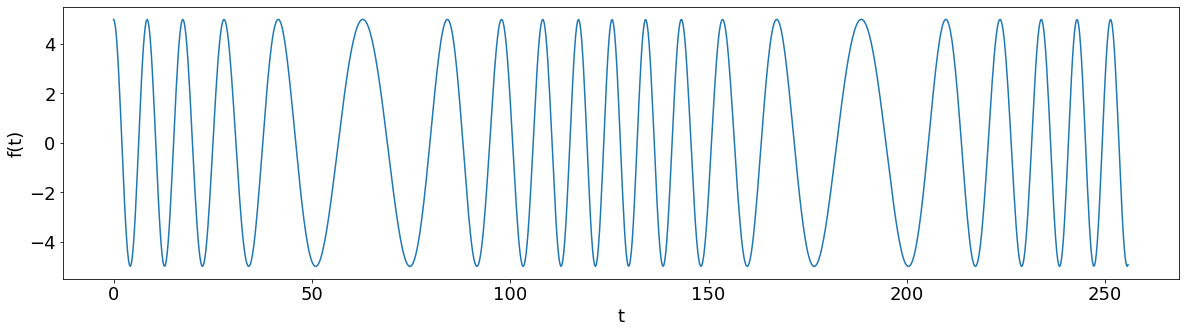

In [68]:
L = 256
N_grid = 2**10

grid = np.linspace(0, L, N_grid+1)
grid = grid[0:N_grid]

f_vals = s(B, alpha, Omega, grid, omega, m)

# plotting f

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(grid, f_vals)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('f(t)', fontsize=18)

plt.show()

Text(0.5, 0, 't')

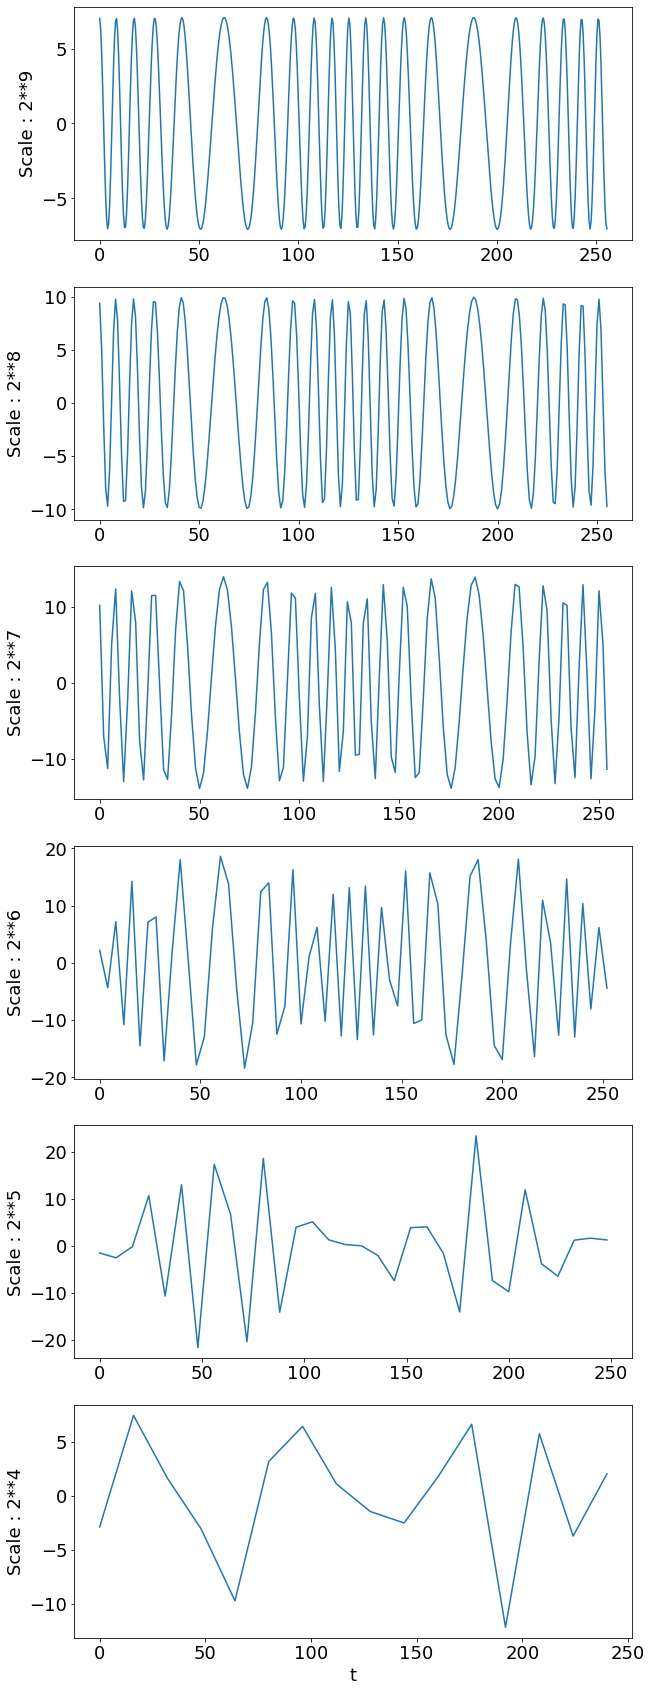

In [69]:
n_scales = 6

f_prev_scale = f_vals
f_next_scale = f_vals

new_grid = grid

fig, ax = plt.subplots(n_scales, 1, figsize=(10, n_scales*5))

for i in range(n_scales):

  f_prev_scale = f_next_scale

  f_next_scale, wf = pywt.dwt( f_prev_scale, wavelet = 'haar'  )

  new_grid = new_grid[0::2]

  ax[i].plot(new_grid, f_next_scale)

  ax[i].tick_params(axis='x', labelsize=18)
  ax[i].tick_params(axis='y', labelsize=18)

  ax[i].set_ylabel('Scale : 2**' + str(int(np.log2(N_grid)-i-1)) , fontsize= 18)
  
ax[n_scales-1].set_xlabel('t', fontsize= 18)

Text(0.5, 0, 't')

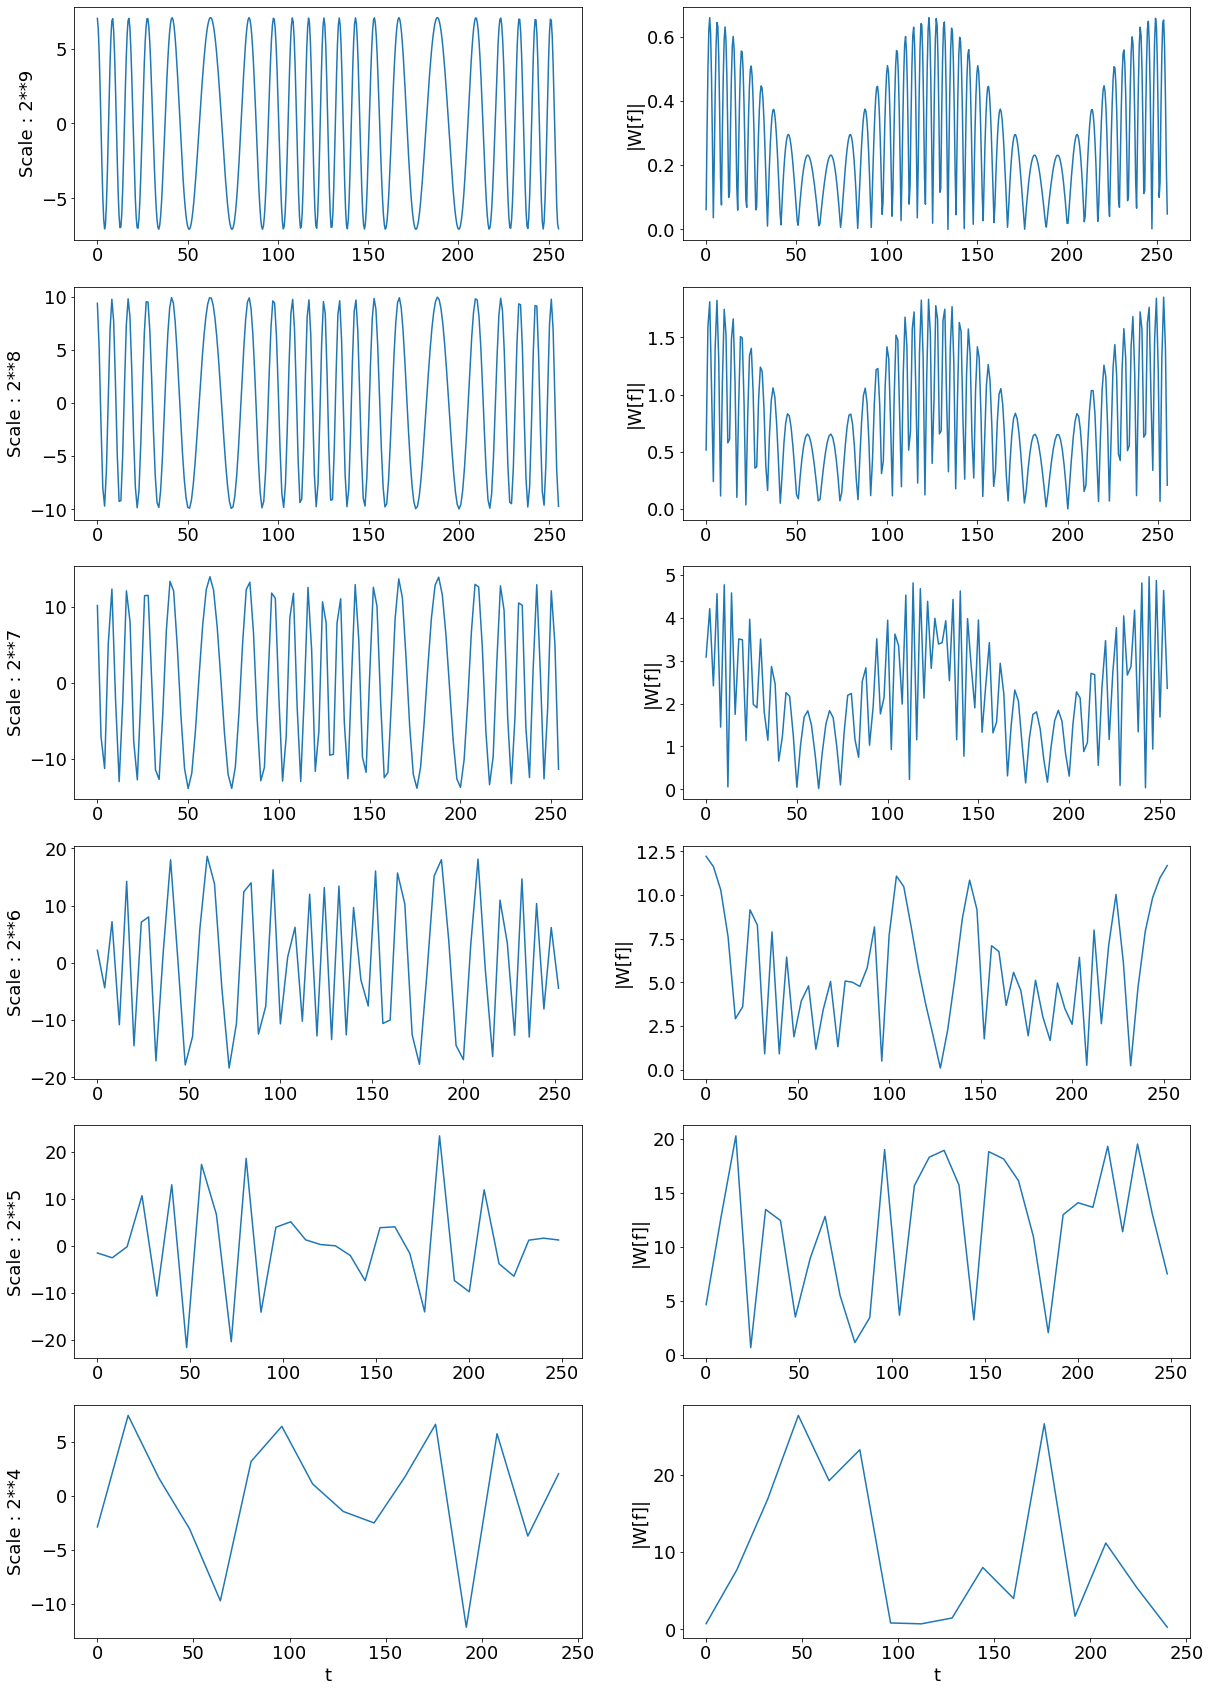

In [70]:
n_scales = 6

f_prev_scale = f_vals
f_next_scale = f_vals

new_grid = grid

fig, ax = plt.subplots(n_scales, 2, figsize=(20, n_scales*5))

for i in range(n_scales):

  f_prev_scale = f_next_scale

  f_next_scale, wf = pywt.dwt( f_prev_scale, wavelet = 'haar'  )

  new_grid = new_grid[0::2]

  ax[i][0].plot(new_grid, f_next_scale)

  ax[i][0].tick_params(axis='x', labelsize=18)
  ax[i][0].tick_params(axis='y', labelsize=18)

  ax[i][0].set_ylabel('Scale : 2**' + str(int(np.log2(N_grid)-i-1)) , fontsize= 18)

  ax[i][1].plot(new_grid, np.abs(wf))
  ax[i][1].tick_params(axis='x', labelsize=18)
  ax[i][1].tick_params(axis='y', labelsize=18)

  ax[i][1].set_ylabel('|W[f]|', fontsize=18)

  
ax[n_scales-1][0].set_xlabel('t', fontsize= 18)
ax[n_scales-1][1].set_xlabel('t', fontsize= 18)

Text(0, 0.5, 'freq (Hz)')

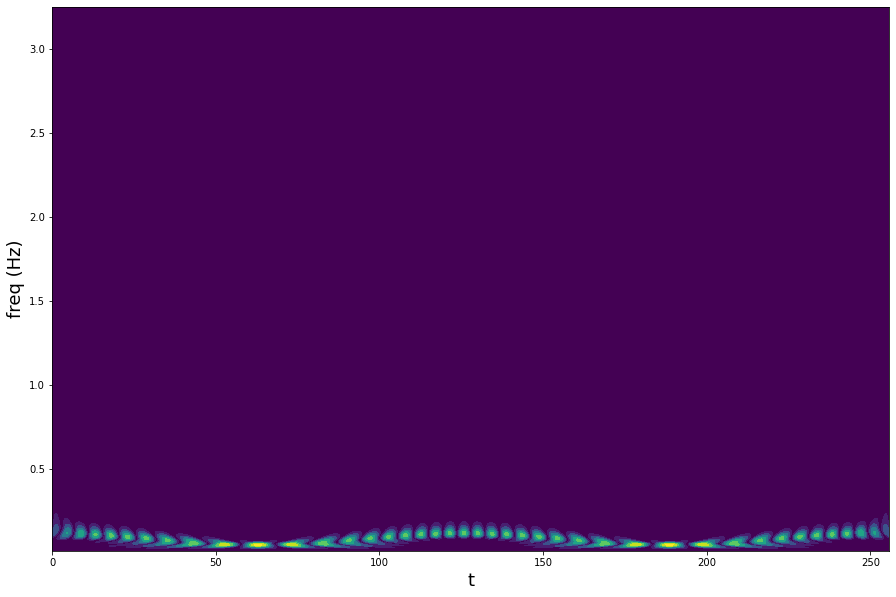

In [80]:
f_vals = s(B, alpha, Omega, grid, omega, m)

g_scales = np.arange(1, 256)
dt = L/N_grid
[gwc, gwf] = pywt.cwt(f_vals, g_scales, 'morl', sampling_period=dt)

fig, ax = plt.subplots(figsize=(15, 10))
ax.contourf(grid, gwf, np.abs(gwc), extend='both')

ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('freq (Hz)', fontsize=18)

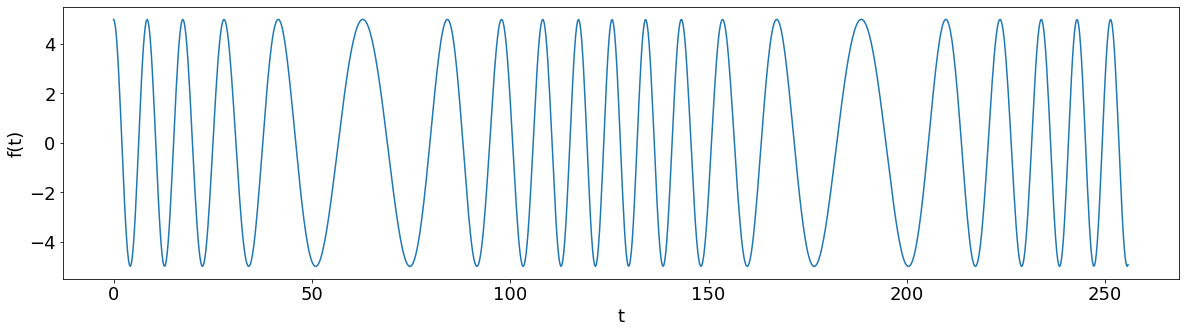

In [81]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(grid, f_vals)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('f(t)', fontsize=18)

plt.show()